# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create settings dictionary with key information 
settings = {
    "units": "imperial", 
    "appid": api_key
}

# Initialize data frame to store data from API calls
WeatherPy_df = pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", "Max Temp", 
                                       "Wind Speed", "Lat","Lng", "Humidity"])

In [4]:
# Perform API calls and send retrieved data to the WeatherPy data frame
# Counter to count the number of calls to API
count = 1
# Error count to record how many cities the API responds back with no data.
err = 0 
# Counter to count the number of call sets
sets = 0 
# Index for the data frame WeatherPy data frame
index = 0 

#Get current time
t0 = time.time()

print(f'Start Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # remove space in city name so the URL retrieved is not broken.
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'Could not get data for {err} cities')

Start Data Retrieval 
 ........................
Processing Record 1 of Set 0 | ilulissat


C:\Users\Endeavor\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Endeavor\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Endeavor\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Endeavor\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Endeavor\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Endeav

Processing Record 2 of Set 0 | cabo san lucas
Processing Record 3 of Set 0 | castro
Processing Record 4 of Set 0 | rikitea
Processing Record 5 of Set 0 | hermanus
Processing Record 6 of Set 0 | alofi
Processing Record 7 of Set 0 | thompson
Processing Record 8 of Set 0 | barentsburg
HTTP Error 404: Not Found
Processing Record 9 of Set 0 | tasiilaq
Processing Record 10 of Set 0 | hilo
Processing Record 11 of Set 0 | farsund
Processing Record 12 of Set 0 | melbu
Processing Record 13 of Set 0 | albany
Processing Record 14 of Set 0 | sao miguel do araguaia
Processing Record 15 of Set 0 | pafos
HTTP Error 404: Not Found
Processing Record 16 of Set 0 | grindavik
Processing Record 17 of Set 0 | nianzishan
Processing Record 18 of Set 0 | khatanga
Processing Record 19 of Set 0 | belushya guba
HTTP Error 404: Not Found
Processing Record 20 of Set 0 | ushuaia
Processing Record 21 of Set 0 | jiwani
Processing Record 22 of Set 0 | taolanaro
HTTP Error 404: Not Found
Processing Record 23 of Set 0 | p

Processing Record 36 of Set 3 | tazovskiy
Processing Record 37 of Set 3 | touros
Processing Record 38 of Set 3 | iquitos
Processing Record 39 of Set 3 | zhuanghe
Processing Record 40 of Set 3 | vila franca do campo
Processing Record 41 of Set 3 | tarudant
HTTP Error 404: Not Found
Processing Record 42 of Set 3 | ambilobe
Processing Record 43 of Set 3 | lagoa
Processing Record 44 of Set 3 | balkanabat
Processing Record 45 of Set 3 | benguela
Processing Record 46 of Set 3 | roald
Processing Record 47 of Set 3 | price
Processing Record 48 of Set 3 | komsomolskiy
Processing Record 49 of Set 3 | ahuimanu
Processing Record 50 of Set 3 | san policarpo
Processing Record 1 of Set 4 | bambous virieux
Processing Record 2 of Set 4 | presidencia roque saenz pena
Processing Record 3 of Set 4 | attawapiskat
HTTP Error 404: Not Found
Processing Record 4 of Set 4 | ales
Processing Record 5 of Set 4 | calama
Processing Record 6 of Set 4 | tiksi
Processing Record 7 of Set 4 | coari
Processing Record 8 of

HTTP Error 404: Not Found
Processing Record 23 of Set 7 | broome
Processing Record 24 of Set 7 | dickinson
Processing Record 25 of Set 7 | hunza
HTTP Error 404: Not Found
Processing Record 26 of Set 7 | newport
Processing Record 27 of Set 7 | tubuala
Processing Record 28 of Set 7 | sambava
Processing Record 29 of Set 7 | gavrilovka vtoraya
Processing Record 30 of Set 7 | west wendover
Processing Record 31 of Set 7 | ilovlya
Processing Record 32 of Set 7 | samarai
Processing Record 33 of Set 7 | takoradi
Processing Record 34 of Set 7 | katsuura
Processing Record 35 of Set 7 | povolzhskiy
Processing Record 36 of Set 7 | vilhena
Processing Record 37 of Set 7 | kaitangata
Processing Record 38 of Set 7 | ontario
Processing Record 39 of Set 7 | natal
Processing Record 40 of Set 7 | robertsport
Processing Record 41 of Set 7 | xining
Processing Record 42 of Set 7 | tambacounda
Processing Record 43 of Set 7 | viedma
Processing Record 44 of Set 7 | egvekinot
Processing Record 45 of Set 7 | luche

Processing Record 11 of Set 11 | chitrakonda
Processing Record 12 of Set 11 | sarkand
Processing Record 13 of Set 11 | manggar
Processing Record 14 of Set 11 | sao joao da barra
Processing Record 15 of Set 11 | baracoa
Processing Record 16 of Set 11 | meulaboh
Processing Record 17 of Set 11 | ngukurr
HTTP Error 404: Not Found
Processing Record 18 of Set 11 | breasta
Processing Record 19 of Set 11 | coahuayana
Processing Record 20 of Set 11 | mbandaka
Processing Record 21 of Set 11 | bueno brandao
Processing Record 22 of Set 11 | nioki
Processing Record 23 of Set 11 | sangar
Processing Record 24 of Set 11 | harper
Processing Record 25 of Set 11 | vila velha
Processing Record 26 of Set 11 | sam roi yot
Processing Record 27 of Set 11 | askarovo
Processing Record 28 of Set 11 | octeville
Processing Record 29 of Set 11 | nuevo casas grandes
Processing Record 30 of Set 11 | coyah
Processing Record 31 of Set 11 | mocuba
Processing Record 32 of Set 11 | totness
Processing Record 33 of Set 11 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the count of cities with weather data
WeatherPy_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Max Temp      541
Wind Speed    541
Lat           541
Lng           541
Humidity      541
dtype: int64

In [6]:
# save to csv file
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

# Display the city weather data frame
WeatherPy_df.head(5)

,City,Cloudiness,Country,Date,Max Temp,Wind Speed,Lat,Lng,Humidity
0,Ilulissat,90,GL,1570828044,35.6,13.87,69.22,-51.1,80
1,Cabo San Lucas,20,MX,1570828044,93.2,18.34,22.89,-109.91,62
2,Castro,90,CL,1570827651,57.2,12.75,-42.48,-73.76,76
3,Rikitea,67,PF,1570828045,68.81,6.85,-23.12,-134.97,56
4,Hermanus,100,ZA,1570828046,57,16.6,-34.42,19.24,93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

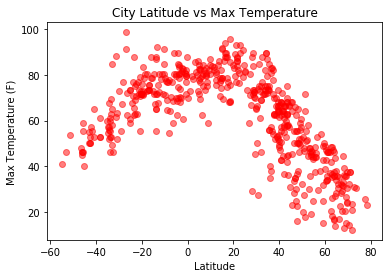

In [23]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='r', alpha=0.5)

# Limits, title and axis names
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')

# Save the Figure
plt.savefig('Images/Latitude vs. Temperature.png')

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

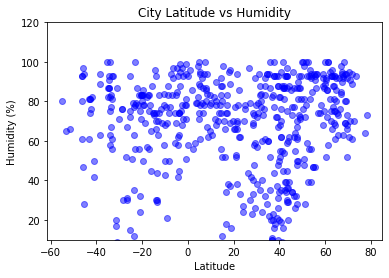

In [24]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='blue', alpha=0.5)

# Limits, title and axis names
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')

# Save the Figure
plt.savefig('Images/Latitude vs. Humidity.png')

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

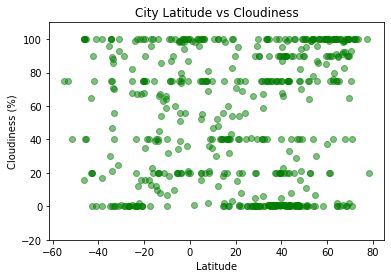

In [25]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='green', alpha=0.5)

# Limits, title and axis names
plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')

# Save the Figure
plt.savefig('Images/Latitude vs. Cloudiness.png')

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

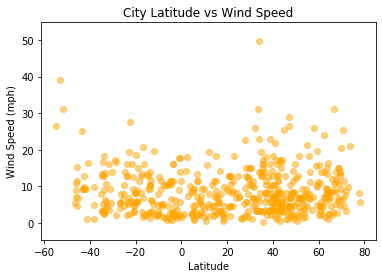

In [26]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

# Limits, title and axis names
plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')

# Save the Figure
plt.savefig('Images/Latitude vs. Wind Speed.png')

# Show the Figure
plt.show()